# Задание
Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')
display(df)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'Смерть от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

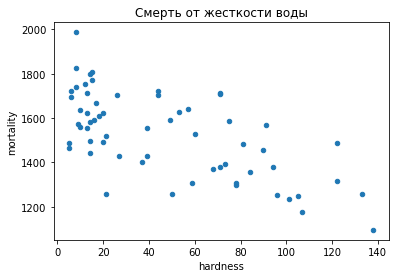

In [3]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Смерть от жесткости воды')

In [4]:
display(df.corr())
display(df.corr(method = 'spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.063011,0.112263
mortality,0.063011,1.000000,-0.631665
hardness,0.112263,-0.631665,1.000000


In [5]:
x = df[['hardness']]
y = df['mortality']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

In [10]:
model = LinearRegression()
print(model.fit(x_train, y_train))
print(model.coef_[0])
print(model.intercept_)

LinearRegression()
-3.074879314077572
1665.3783755286465


In [14]:
y_pred = model.predict(x_test)
y_pred

array([1628.47982376, 1619.25518582, 1490.11025463, 1290.24309921,
       1622.33006513, 1600.80590993, 1634.62958239, 1447.06194423,
       1447.06194423, 1483.960496  , 1241.04503019, 1619.25518582,
       1376.33972001])

In [15]:
model.score(x_test, y_test)  #коэф детерм

0.5493474597378303

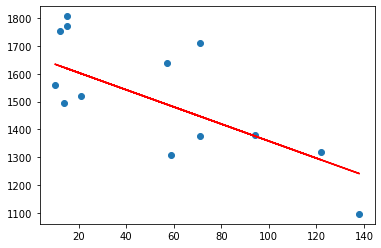

In [16]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

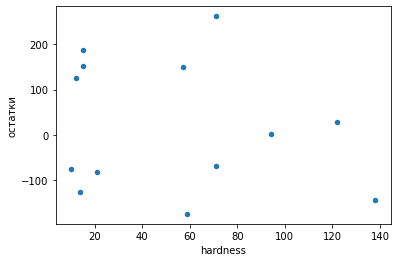

In [17]:
res_df = x_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df['остатки'] = res_df['y_test'] - res_df['y_pred']
res_df
res_df.plot(kind='scatter', x='hardness', y ='остатки')

In [ ]:
# Вывод - зависимость смертности от жеской воды прослеживается

In [19]:
df_south = df[df.location == 'South']
df_north = df[df.location == 'North']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

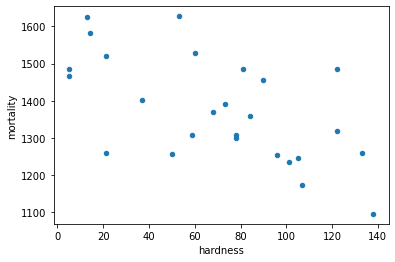

In [20]:
df_south.plot(x='hardness', y='mortality', kind='scatter')

In [21]:
display(df_south.corr())
display(df_south.corr(method = 'spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.396333,-0.005337
mortality,0.396333,1.000000,-0.602153
hardness,-0.005337,-0.602153,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.354591,-0.013685
mortality,0.354591,1.000000,-0.595723
hardness,-0.013685,-0.595723,1.000000


In [22]:
x_s = df_south[['hardness']]
y_s = df_south['mortality']

In [23]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.25, random_state=100)

In [24]:
model_s = LinearRegression()
print(model_s.fit(x_train_s, y_train_s))
print(model_s.coef_[0])
print(model_s.intercept_)

LinearRegression()
-2.277318307370766
1536.2416247115418


In [25]:
y_pred_s = model_s.predict(x_test_s)
y_pred_s

array([1488.41794026, 1399.60252627, 1401.87984458, 1451.98084734,
       1488.41794026, 1381.38397981, 1415.54375442])

In [26]:
model_s.score(x_test_s, y_test_s)

-0.2029902404725139

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

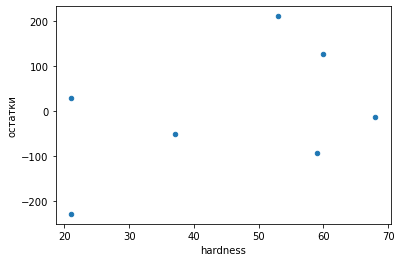

In [30]:
res_df = x_test_s.copy()
res_df['y_pred_s'] = y_pred_s
res_df['y_test_s'] = y_test_s
res_df['остатки'] = res_df['y_test_s'] - res_df['y_pred_s']
res_df
res_df.plot(kind='scatter', x ='hardness', y ='остатки')

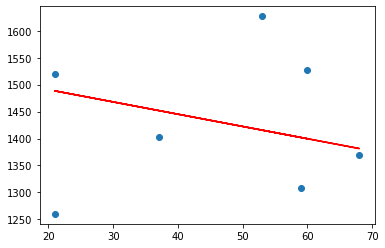

In [31]:
plt.scatter(x_test_s, y_test_s)
plt.plot(x_test_s, y_pred_s, c='r')

In [ ]:
#Вывод - сметность не связана на юге с жесткостью воды, параметр детерминации очень низкий

In [32]:
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

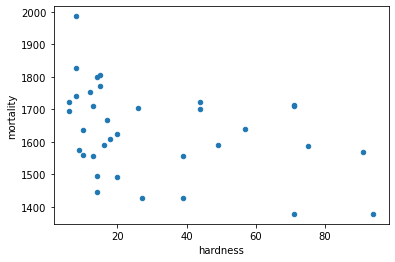

In [33]:
df_north.plot(x='hardness', y='mortality', kind='scatter')

In [35]:
display(df_north.corr())
display(df_north.corr('spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.103548,0.309195
mortality,-0.103548,1.000000,-0.368598
hardness,0.309195,-0.368598,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.109812,0.222145
mortality,-0.109812,1.000000,-0.404208
hardness,0.222145,-0.404208,1.000000


In [36]:
x_n = df_north[['hardness']]
y_n = df_north['mortality']

In [37]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.25, random_state=100)

In [38]:
model_n = LinearRegression()
print(model_n.fit(x_train_n, y_train_n))
print(model_n.coef_[0])
print(model_n.intercept_)

LinearRegression()
-1.6177233391261394
1668.4841829938514


In [39]:
y_pred_n = model_n.predict(x_test_n)

In [40]:
model_n.score(x_test_n, y_test_n)

0.05974710006205797

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

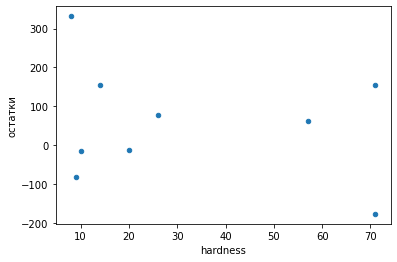

In [42]:
res_df = x_test_n.copy()
res_df['y_pred_n'] = y_pred_n
res_df['y_test_n'] = y_test_n
res_df['остатки'] = res_df['y_test_n'] - res_df['y_pred_n']
res_df
res_df.plot(kind='scatter', x ='hardness', y ='остатки')

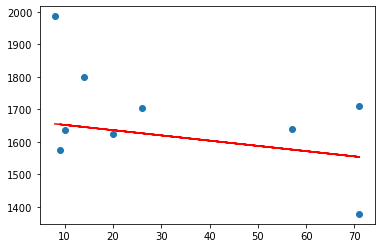

In [43]:
plt.scatter(x_test_n, y_test_n)
plt.plot(x_test_n, y_pred_n, c='r')

In [ ]:
#Вывод - так же как и с южными городами взаимосвязи между смертью и жесткостью воды нет.